# Relative_crop_yield_intensity

In [25]:
# Ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

#Process data    
import numpy as np
import xarray as xr

#Display data 
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.vector_transform import vector_scalar_to_grid
from matplotlib.axes import Axes
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.image as image
import matplotlib.pyplot as plt

#Writing data files
import pandas as pd

In [26]:
mean_yields1996to2005=np.load('mean_yields1996to2005.npy')
mean_yields2006to2015_rcp26=np.load('mean_yields2006to2015_rcp26.npy')
mean_yields2006to2015_rcp60=np.load('mean_yields2006to2015_rcp60.npy')
RefYields=mean_yields1996to2005/2+(mean_yields2006to2015_rcp26+mean_yields2006to2015_rcp60)/4

In [27]:
yield2050RCP26=np.load('rcp26_2050s_maize_noirr_2040-2069_averaged_yield.npy')
yield2080RCP26=np.load('rcp26_2080s_maize_noirr_20_2070-2099_averaged_yield.npy')
yield2050RCP60=np.load('rcp60_2050s_maize_noirr_2040-2069_averaged_yield.npy')
yield2080RCP60=np.load('rcp60_2080s_maize_noirr_20_2070-2099_averaged_yield.npy')

In [28]:
X=np.load('rainfed_maize_production_Xgrid.npy')
Y=np.load('rainfed_maize_production_Ygrid.npy')

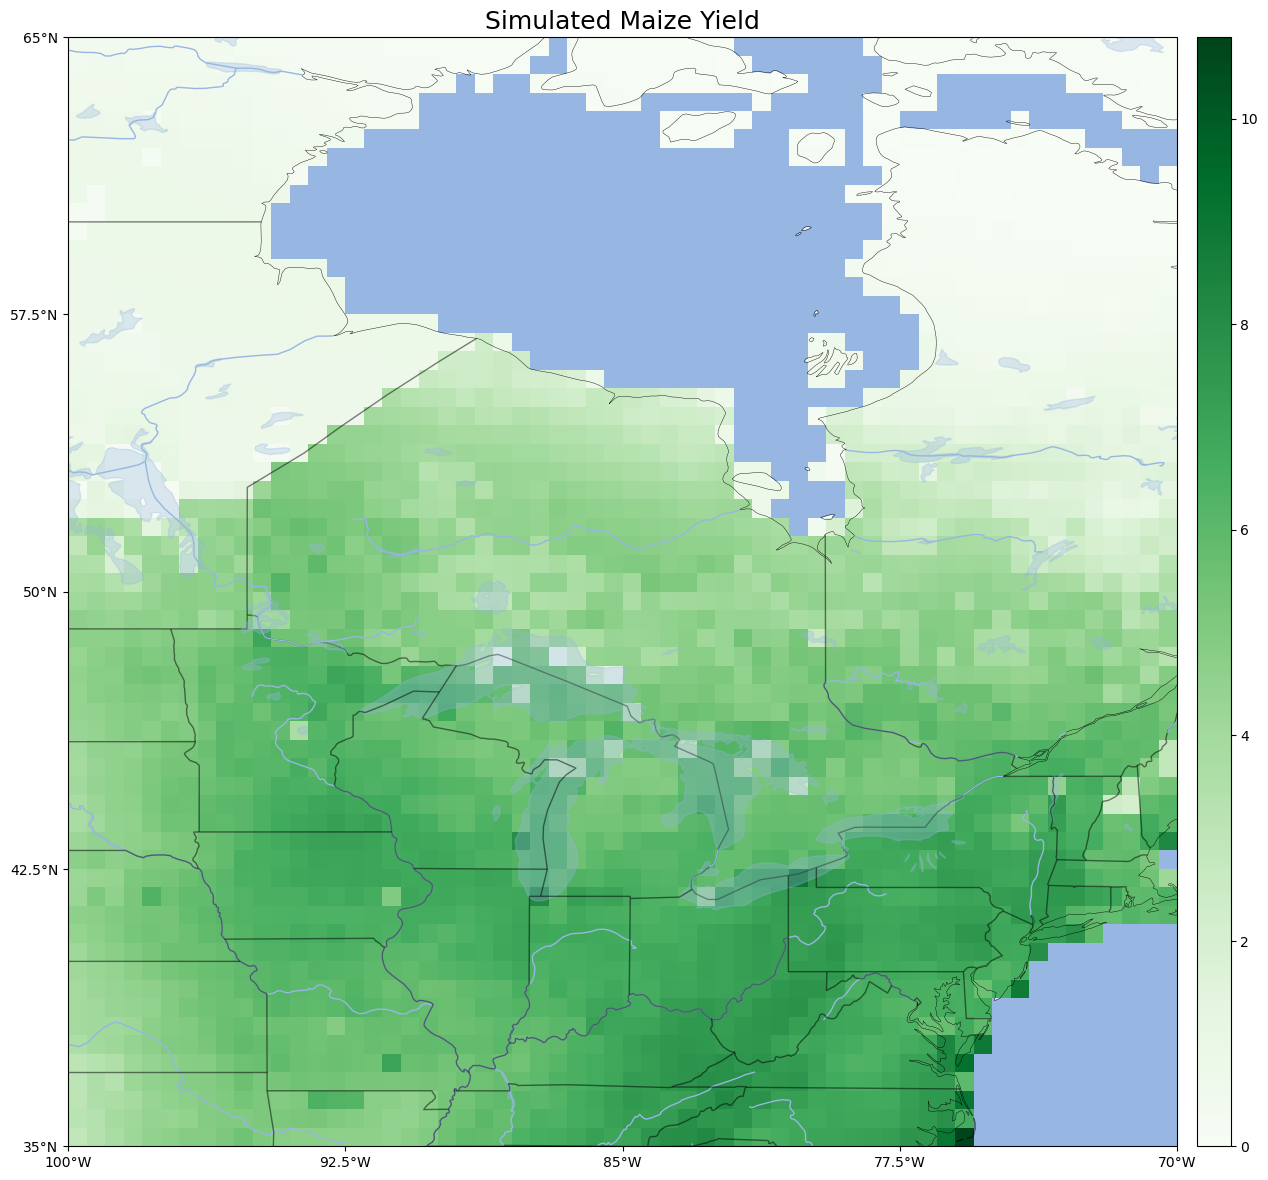

In [29]:
ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Simulated Maize Yield',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(X, Y, RefYields,
#                       vmin=0.0,
#                       vmax=50,
                      transform=projection,
                      cmap='Greens')
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('RelativeCropIntensity/maize_rainfed_1996_2015.png',dpi=150)

In [30]:
pcts=np.empty(shape=(1,5),dtype=float)
pcts[0,0]=np.nanpercentile(RefYields,2.5)
pcts[0,1]=np.nanpercentile(RefYields,25)
pcts[0,2]=np.nanpercentile(RefYields,50)
pcts[0,3]=np.nanpercentile(RefYields,75)
pcts[0,4]=np.nanpercentile(RefYields,97.5)
pcts

array([[0.04204833, 0.9470205 , 4.67926979, 6.06298973, 7.46368108]])

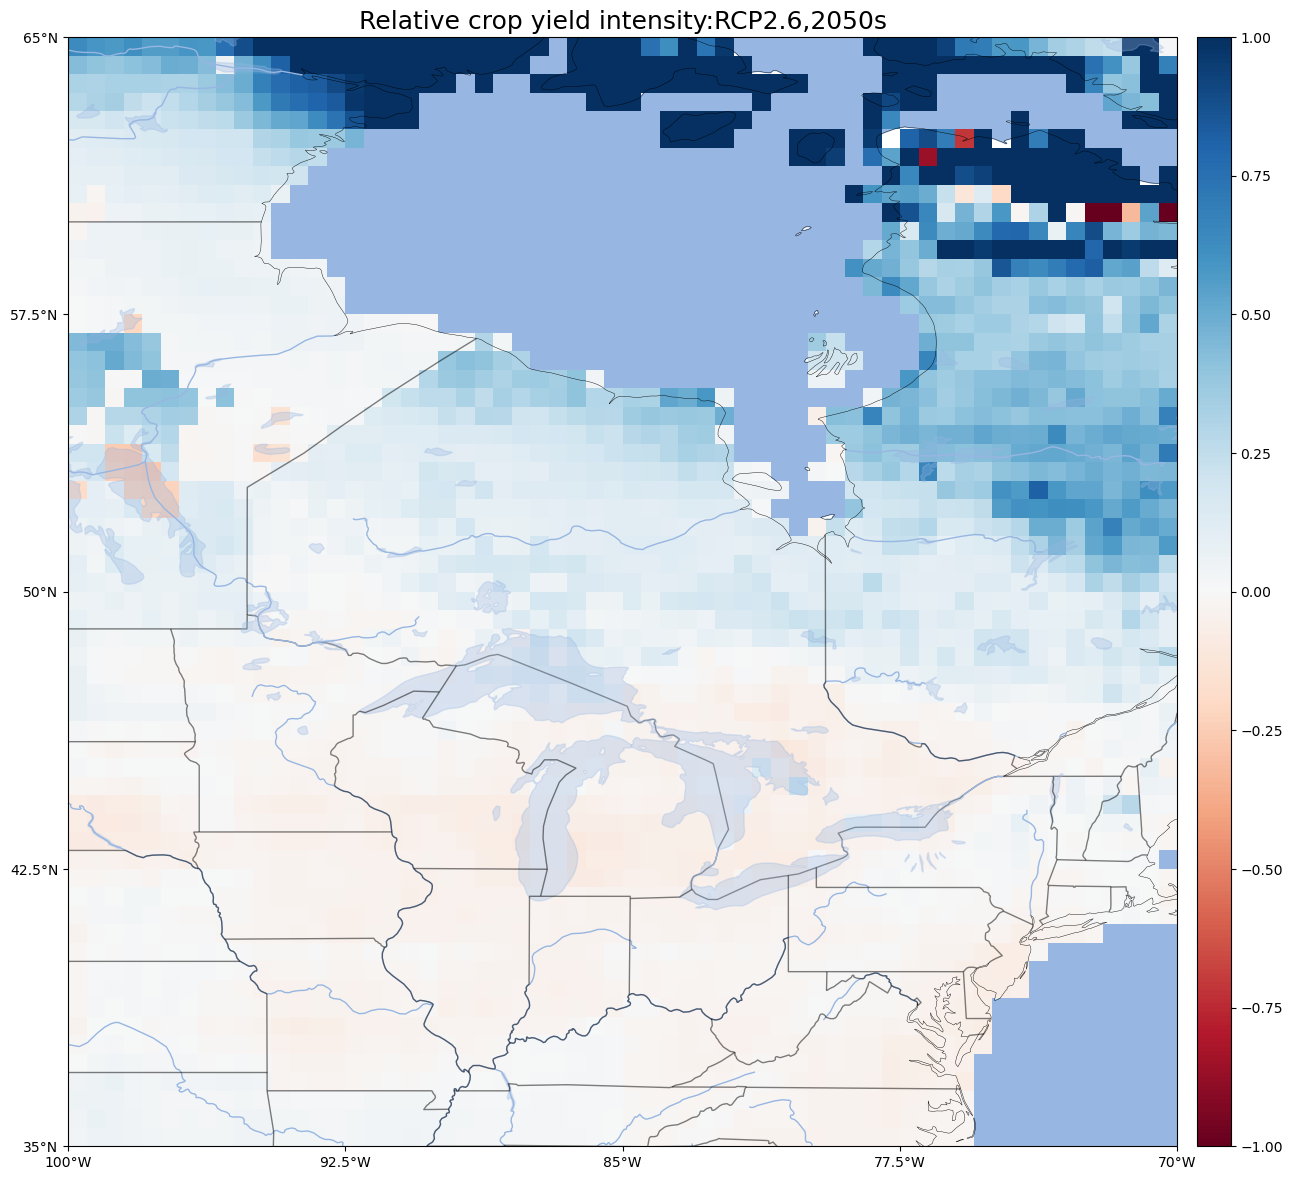

In [31]:
rci2050RCP26=(yield2050RCP26-RefYields)/RefYields
ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Relative crop yield intensity:RCP2.6,2050s',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(X, Y, rci2050RCP26,
                      vmin=-1.0,
                      vmax=1,
                      transform=projection,
                      cmap='RdBu')
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('RelativeCropIntensity/relative_crop_intensity_2050sRCP26.png',dpi=150)

In [32]:
pcts=np.empty(shape=(1,5),dtype=float)
pcts[0,0]=np.nanpercentile(rci2050RCP26,2.5)
pcts[0,1]=np.nanpercentile(rci2050RCP26,25)
pcts[0,2]=np.nanpercentile(rci2050RCP26,50)
pcts[0,3]=np.nanpercentile(rci2050RCP26,75)
pcts[0,4]=np.nanpercentile(rci2050RCP26,97.5)
pcts

array([[-0.07031252, -0.02200496,  0.02450574,  0.18262173,  1.79713267]])

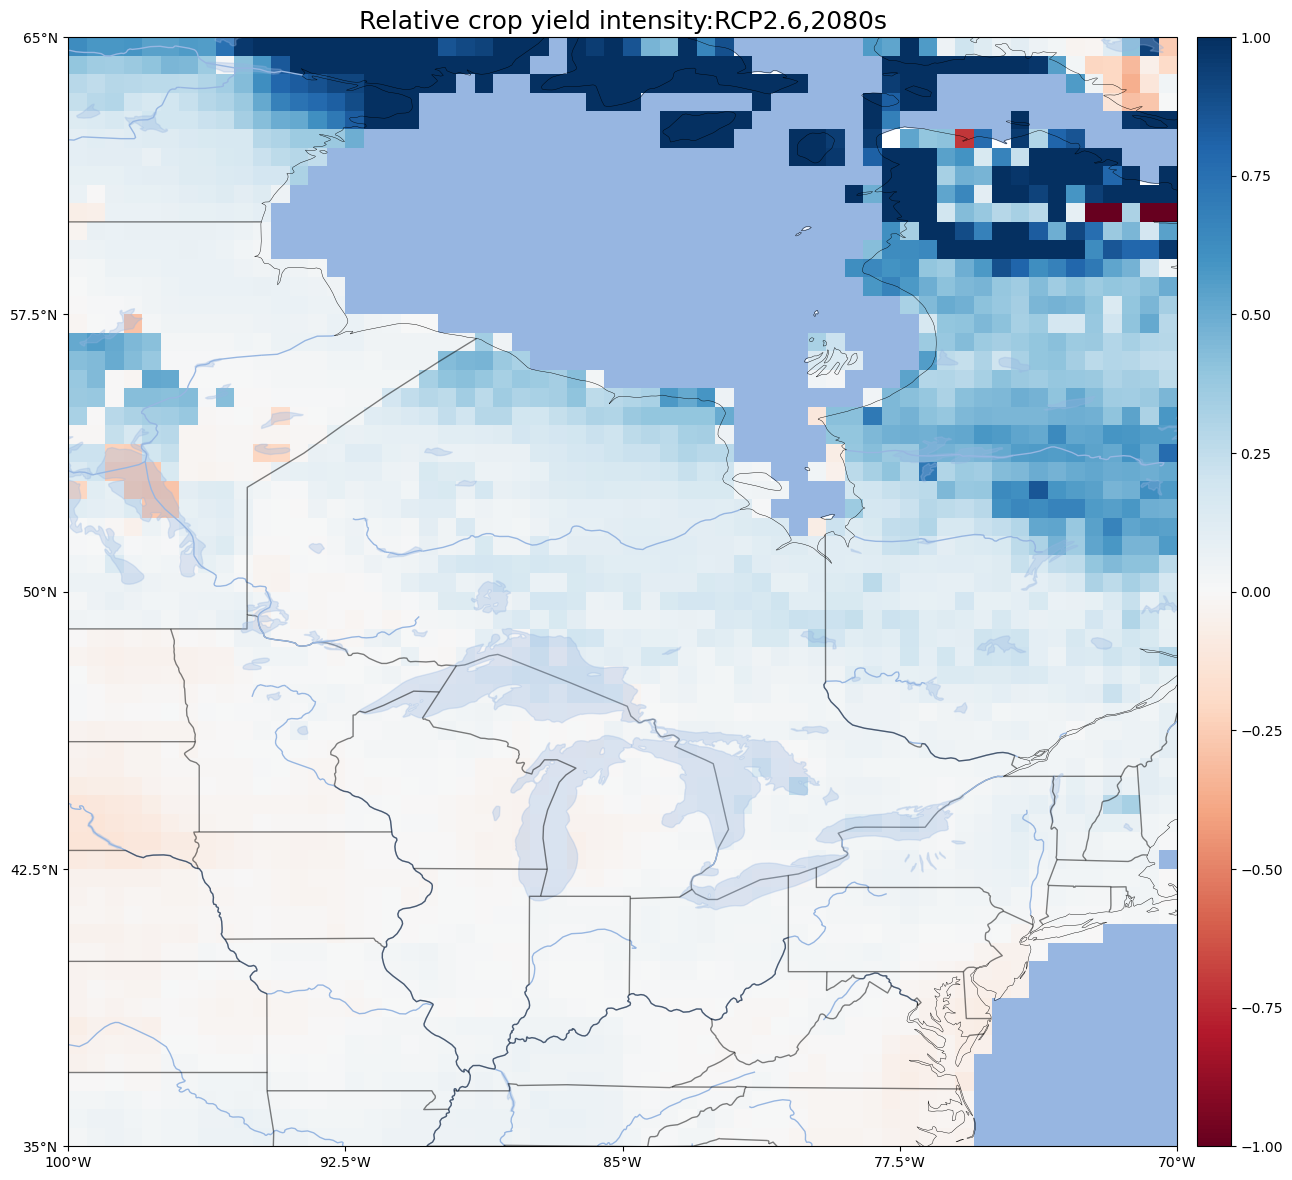

In [33]:
rci2080RCP26=(yield2080RCP26-RefYields)/RefYields
ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Relative crop yield intensity:RCP2.6,2080s',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(X, Y, rci2080RCP26,
                      vmin=-1.0,
                      vmax=1,
                      transform=projection,
                      cmap='RdBu')
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('RelativeCropIntensity/relative_crop_intensity_2080sRCP26.png',dpi=150)

In [34]:
pcts=np.empty(shape=(1,5),dtype=float)
pcts[0,0]=np.nanpercentile(rci2080RCP26,2.5)
pcts[0,1]=np.nanpercentile(rci2080RCP26,25)
pcts[0,2]=np.nanpercentile(rci2080RCP26,50)
pcts[0,3]=np.nanpercentile(rci2080RCP26,75)
pcts[0,4]=np.nanpercentile(rci2080RCP26,97.5)
pcts

array([[-0.05727568,  0.00420727,  0.04242771,  0.1697114 ,  1.44519867]])

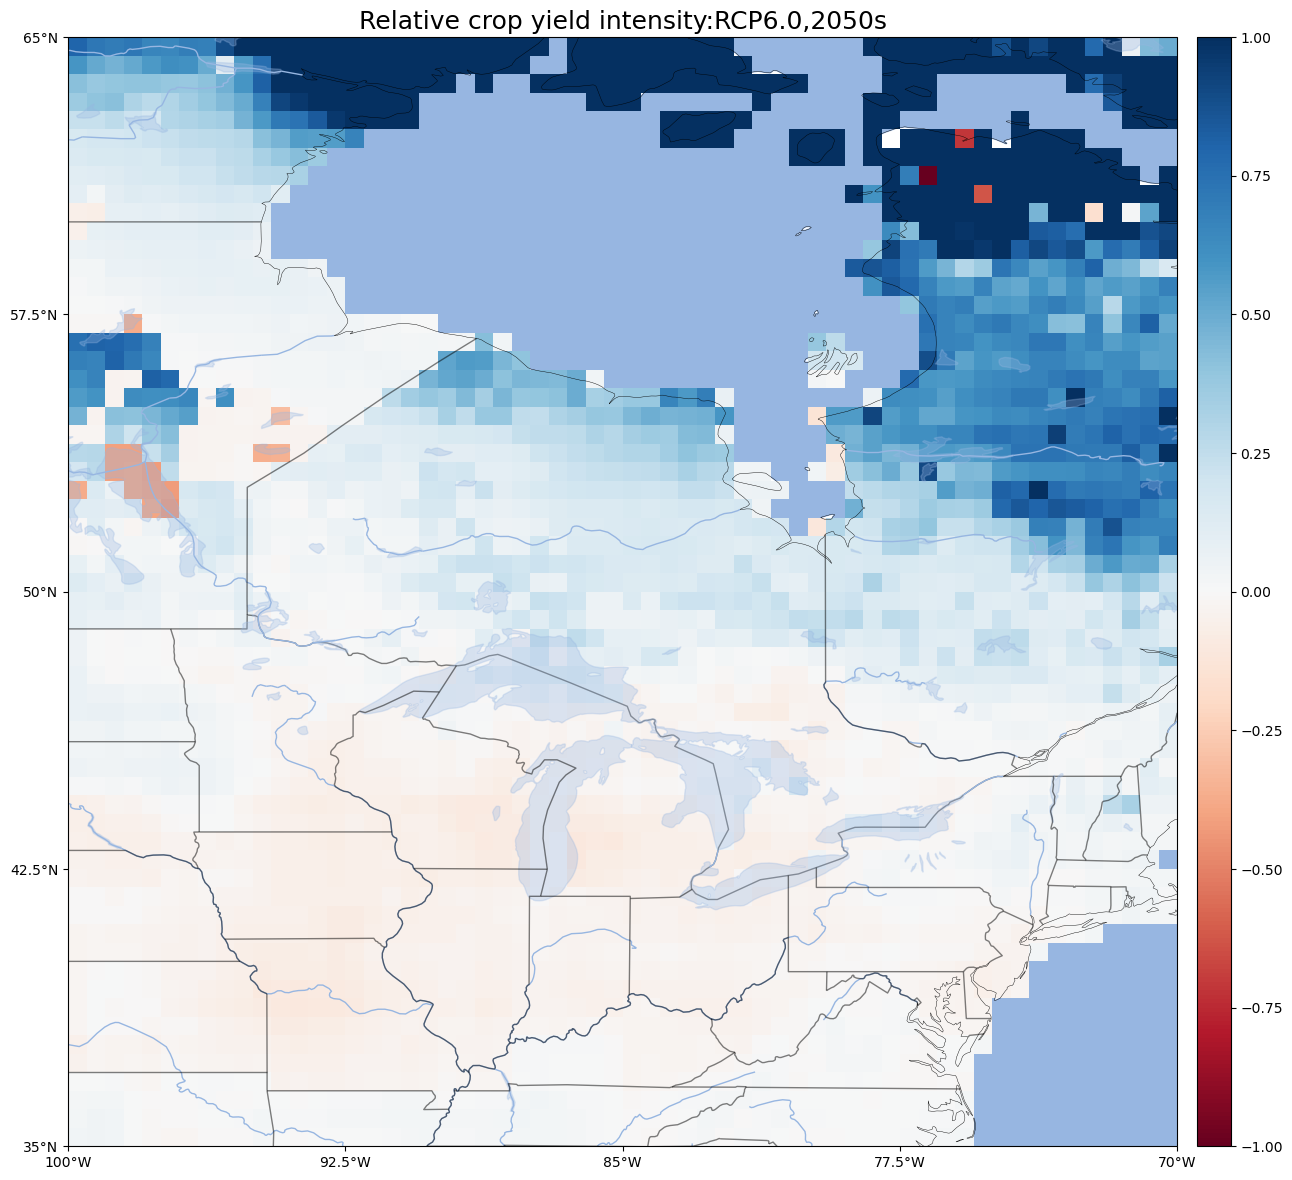

In [35]:
rci2050RCP60=(yield2050RCP60-RefYields)/RefYields
ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Relative crop yield intensity:RCP6.0,2050s',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(X, Y, rci2050RCP60,
                      vmin=-1.0,
                      vmax=1,
                      transform=projection,
                      cmap='RdBu')
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('RelativeCropIntensity/relative_crop_intensity_2050sRCP60.png',dpi=150)

In [36]:
pcts=np.empty(shape=(1,5),dtype=float)
pcts[0,0]=np.nanpercentile(rci2050RCP60,2.5)
pcts[0,1]=np.nanpercentile(rci2050RCP60,25)
pcts[0,2]=np.nanpercentile(rci2050RCP60,50)
pcts[0,3]=np.nanpercentile(rci2050RCP60,75)
pcts[0,4]=np.nanpercentile(rci2050RCP60,97.5)
pcts

array([[-0.07359837, -0.01883168,  0.0301284 ,  0.23122421,  2.61733882]])

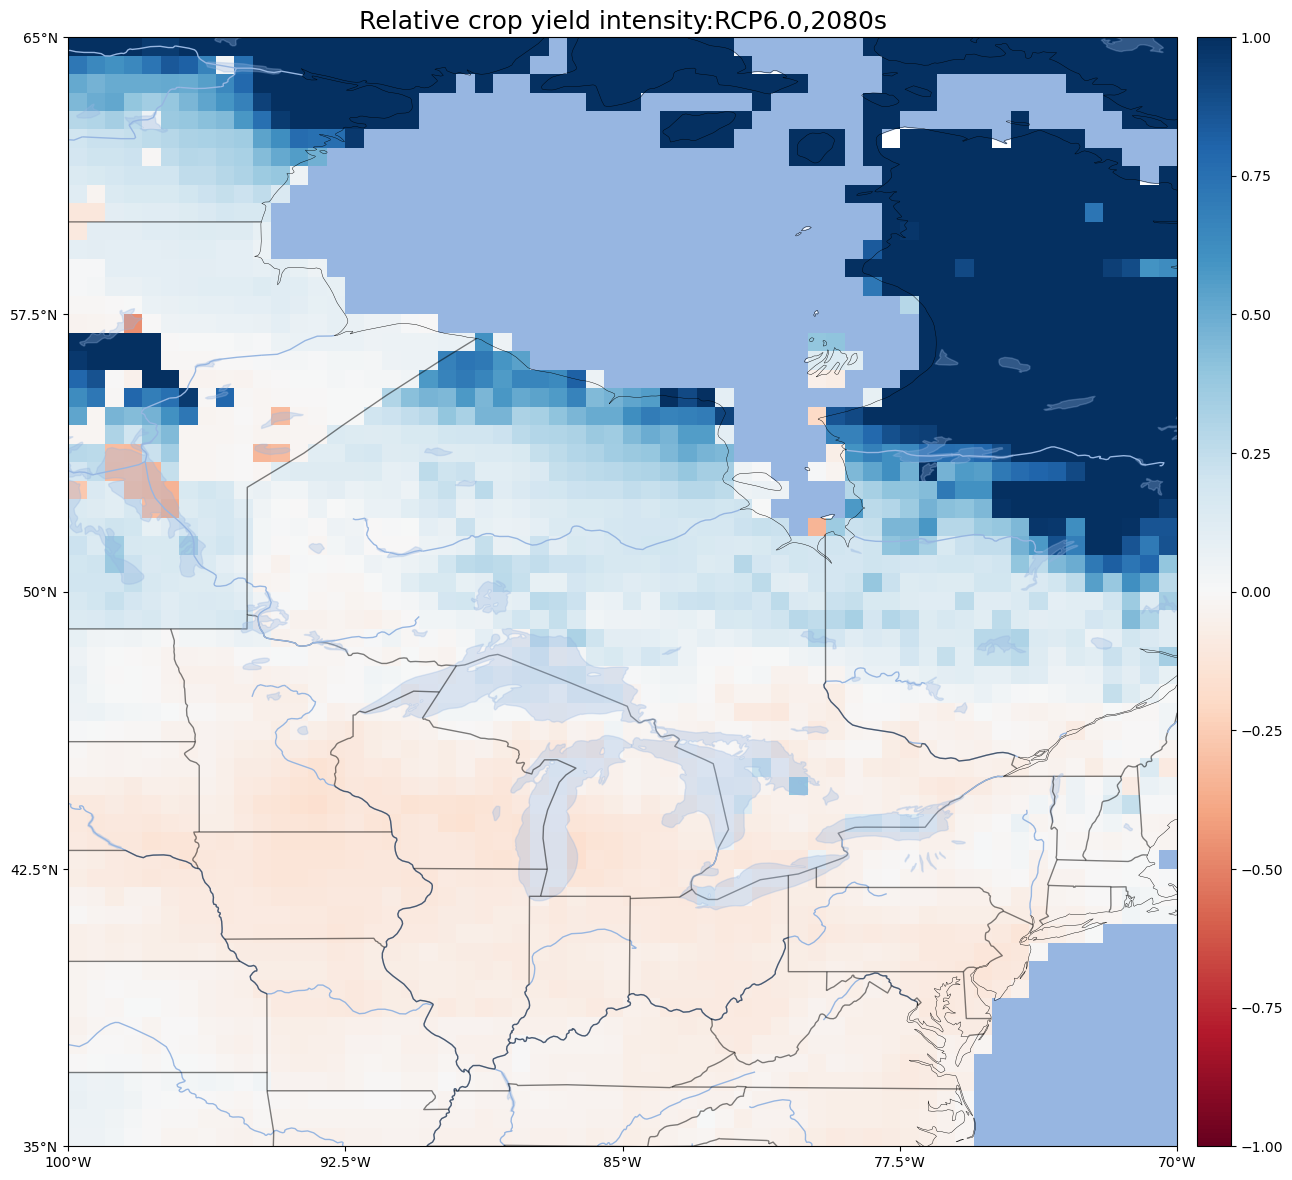

In [37]:
rci2080RCP60=(yield2080RCP60-RefYields)/RefYields
ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Relative crop yield intensity:RCP6.0,2080s',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(X, Y, rci2080RCP60,
                      vmin=-1.0,
                      vmax=1,
                      transform=projection,
                      cmap='RdBu')
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('RelativeCropIntensity/relative_crop_intensity_2080sRCP60.png',dpi=150)

In [38]:
pcts=np.empty(shape=(1,5),dtype=float)
pcts[0,0]=np.nanpercentile(rci2080RCP60,2.5)
pcts[0,1]=np.nanpercentile(rci2080RCP60,25)
pcts[0,2]=np.nanpercentile(rci2080RCP60,50)
pcts[0,3]=np.nanpercentile(rci2080RCP60,75)
pcts[0,4]=np.nanpercentile(rci2080RCP60,97.5)
pcts

array([[-0.12445696, -0.05302823,  0.01252934,  0.27872113,  5.78183957]])